# **Como es el reparto de ingresos, actividad realizada y horas trabajadas en Estado Unidos**

## Introducción
**Contexto empresarial.** En Estados Unidos son muchas las personas nativas o extranjeras de las que se tiene registro de horas trabajadas semanalmente, se han recopilado datos con detalle del sexo, etnias o razas, nivel de estudio y edad entre otros datos.
Un ente nacional nos ha contratado para que se hagan visualizaciones para determinar como es la distribución de horas trabajadas y los niveles de ingresos según las clasificaciones con las que se cuenta en los datos proporciondos.

**Problema empresarial.** La tarea es formatear los datos que nos han proporcionado para responder las preguntas del ente nacional, abajo citadas.

**Contexto analítico.** Se nos facilita un archivo CSV (ubicada en la carpeta `dataset`) que uliliza la coma (`,`) como delimitados, que contiene sobre `agrupaciones` realizadas sobre edad, tipo de trabajo, ocupación, educación, raza, sexo, cantidad de horas trabajadas en la semana, nivel de ingreso (solo se identifican como '>50K' o '<=50K') y capital ganado y perdido.
La fuente es: https://www.kaggle.com/datasets/amirhosseinmirzaie/americancitizenincome

Al ser agrupaciones hay una columna que indica la cantidad de personas que tienen los mismos atributos, el dataset cuenta con 25.000 registros que representan a millones de casos registrados. Se realizarás las siguientes tareas con los datos:

1. Leer, transformar y preparar los datos para su visualización.
2. Realizar análisis y construir visualizaciones de los datos para identificar la patrones en el dataset.

El cliente tiene unas preguntas especificas a las que le gustaría obtener respuestas y deberá proporcionar visualizaciones para comprender:

1. ¿Cual es el porcentaje de horas trabajadas por sexo?
2. ¿Como es la distribución de horas según el tipo de ingreso ('<=50K' o '>50K') que tiene cada género?
3. ¿Cual es el promedio de horas trabajadas por raza?
4. ¿Como es la distribución de personas registradas por razas separada por sexos?
5. ¿Como se la distribución de personas de las distintas razas y generos pero mostrando la edad?
6. ¿Cual es la distribución de horas trabajadas según la edad de las personas?
7. ¿Como son los ingresos según el nivel de educación?
8. sobre el nivel de educación ¿Que tipo de tareas realizan los de mayor ingreso? ¿y que ocupaciones tiene?
9. sobre los niveles de educación ¿Como es la distribución por edades?
10. ¿Como es la distribución de ocupaciones para los nacidos en Estados Unidos y los extranjeros?
11. ¿Como es la distribución de horas trabajadas por semana?

## Seteo ambiente

### importar librerias

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as sm

import numpy as np
from sklearn import datasets, linear_model
from sklearn.compose import make_column_transformer
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, classification_report, roc_auc_score, roc_curve, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.utils import resample
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier


### seteo style

In [2]:
mpl.style.use('bmh')


### montar google drive

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


### leer archivo cvs

Fuente: https://www.kaggle.com/datasets/amirhosseinmirzaie/americancitizenincome

In [4]:
dfAmericanIncome = pd.read_csv('/content/drive/MyDrive/CURSOS/Coderhouse/Data_Science/Data_Science/Desafios/07_Primera_entrega_proyecto_final/datasets/AmericanCitizensAnnualIncome.csv', sep=',')
dfAmericanIncome

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,40,Self-emp-not-inc,223881,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,70,United-States,>50K
1,30,Private,149118,HS-grad,9,Divorced,Craft-repair,Not-in-family,White,Female,0,0,40,United-States,<=50K
2,46,Private,109209,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,>50K
3,32,Private,229566,Assoc-voc,11,Married-civ-spouse,Other-service,Husband,White,Male,0,0,60,United-States,>50K
4,54,?,148657,Preschool,1,Married-civ-spouse,?,Wife,White,Female,0,0,40,Mexico,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,40,Private,130834,Some-college,10,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
24996,31,Local-gov,33124,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,50,United-States,<=50K
24997,38,Federal-gov,190895,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,?,>50K
24998,23,Private,420973,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States,<=50K


## Overview del dataset

### Descripción de las colmunas
| Nombre | Contenido |
| -------|-----------|
| edad | Edad de los individuos de la muestra |
| situacionLaboral | Situación laboral |
| tamanioMuestra | Candidad de individuos que contiene la muestra |
| educacion | Nivel más alto de educación alcanzado por un individuo |
| aniosEstudio | Nivel más alto de educación alcanzado por un individuo en formato numérico |
| estadoCivil | Estado civil de un individuo. Tenga en cuenta que Casado-civ-cónyuge se refiere a un cónyuge civil, y Casado-AF-cónyuge se refiere a un cónyuge en las Fuerzas Armadas |
| ocupacion | Tipo general de ocupación de un individuo |
| relacion | Relación de este individuo con otros, por ejemplo, cónyuge (Esposo) |
| carrera | carrera |
| sexo | sexo |
| capitalGanado | Capital ganado de un individuo |
| capitalPerdido | Capital perdido de un individuo |
| horasXSsem | Número de horas que el individuo reportó trabajar por semana |
| pais | País de origen |
| ingresos | Ingreso, menor o igual a $50,000 (<=50K) o mayor que eso (>50K) |

---

### info

In [5]:
dfAmericanIncome.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             25000 non-null  int64 
 1   workclass       25000 non-null  object
 2   fnlwgt          25000 non-null  int64 
 3   education       25000 non-null  object
 4   education.num   25000 non-null  int64 
 5   marital.status  25000 non-null  object
 6   occupation      25000 non-null  object
 7   relationship    25000 non-null  object
 8   race            25000 non-null  object
 9   sex             25000 non-null  object
 10  capital.gain    25000 non-null  int64 
 11  capital.loss    25000 non-null  int64 
 12  hours.per.week  25000 non-null  int64 
 13  native.country  25000 non-null  object
 14  income          25000 non-null  object
dtypes: int64(6), object(9)
memory usage: 2.9+ MB


### describe

In [6]:
dfAmericanIncome.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,25000.00000,2.500000e+04,25000.000000,25000.000000,25000.000000,25000.000000
mean,38.60916,1.896611e+05,10.076320,1083.144040,87.489800,40.442800
std,13.68660,1.054713e+05,2.576967,7321.971568,402.830246,12.309706
min,17.00000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.00000,1.179830e+05,9.000000,0.000000,0.000000,40.000000
50%,37.00000,1.782110e+05,10.000000,0.000000,0.000000,40.000000
75%,48.00000,2.370682e+05,12.000000,0.000000,0.000000,45.000000
max,90.00000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### valores nulos

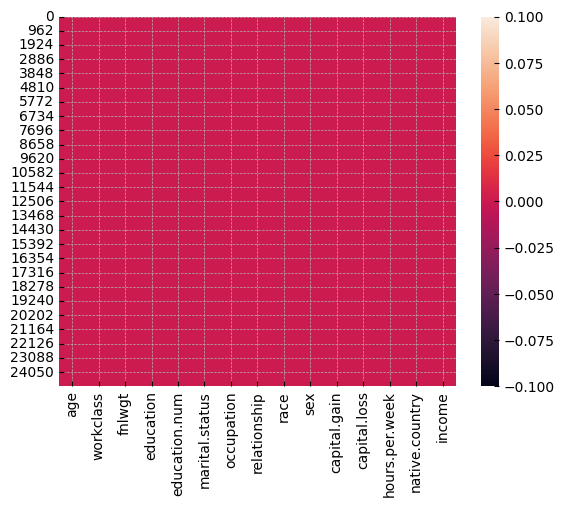

In [7]:
sns.heatmap(dfAmericanIncome.isnull())
plt.show()

### reemplazar los '?' por 'NoData'

In [8]:
dfAmericanIncome['workclass'].replace('?', 'NoData', inplace=True)
dfAmericanIncome['occupation'].replace('?', 'NoData', inplace=True)
dfAmericanIncome['native.country'].replace('?', 'NoData', inplace=True)
dfAmericanIncome

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,40,Self-emp-not-inc,223881,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,70,United-States,>50K
1,30,Private,149118,HS-grad,9,Divorced,Craft-repair,Not-in-family,White,Female,0,0,40,United-States,<=50K
2,46,Private,109209,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,>50K
3,32,Private,229566,Assoc-voc,11,Married-civ-spouse,Other-service,Husband,White,Male,0,0,60,United-States,>50K
4,54,NoData,148657,Preschool,1,Married-civ-spouse,NoData,Wife,White,Female,0,0,40,Mexico,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,40,Private,130834,Some-college,10,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
24996,31,Local-gov,33124,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,50,United-States,<=50K
24997,38,Federal-gov,190895,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,NoData,>50K
24998,23,Private,420973,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States,<=50K


### head(10)

In [9]:
print(dfAmericanIncome.head(10))

   age         workclass  fnlwgt     education  education.num  \
0   40  Self-emp-not-inc  223881   Prof-school             15   
1   30           Private  149118       HS-grad              9   
2   46           Private  109209  Some-college             10   
3   32           Private  229566     Assoc-voc             11   
4   54            NoData  148657     Preschool              1   
5   63           Private  111963  Some-college             10   
6   25           Private  207875       7th-8th              4   
7   71         Local-gov  229110       HS-grad              9   
8   37           Private   66686       HS-grad              9   
9   44           Private  227399     Assoc-voc             11   

       marital.status         occupation    relationship   race     sex  \
0  Married-civ-spouse     Prof-specialty         Husband  White    Male   
1            Divorced       Craft-repair   Not-in-family  White  Female   
2  Married-civ-spouse       Adm-clerical         Husband  W

#### Crear DF con columnas necesarias para los gráficos

In [10]:
dfAmericanIncomeGraficos = dfAmericanIncome.copy()

arrCantHorasTrabajadas = [(dfAmericanIncomeGraficos['fnlwgt'][fila] * dfAmericanIncomeGraficos['hours.per.week'][fila]) for  fila in dfAmericanIncomeGraficos.index]
dfAmericanIncomeGraficos['horasTrabajadasTotales'] = arrCantHorasTrabajadas

arrOrigenNacionalidad = ['Estados Unidos' if  dfAmericanIncomeGraficos['native.country'][fila] == 'United-States' else 'Extranjero'  for  fila in dfAmericanIncomeGraficos.index]
dfAmericanIncomeGraficos['origen'] = arrOrigenNacionalidad

arrIngresoMayor50 = [1 if  dfAmericanIncomeGraficos['income'][fila] == '>50K' else 0  for  fila in dfAmericanIncomeGraficos.index]
dfAmericanIncomeGraficos['ingresoMayor50'] = arrIngresoMayor50

dfAmericanIncomeGraficos['horasPorSemana'] = dfAmericanIncomeGraficos['hours.per.week']
dfAmericanIncomeGraficos

dfAmericanIncomeGraficos

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,horasTrabajadasTotales,origen,ingresoMayor50,horasPorSemana
0,40,Self-emp-not-inc,223881,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,70,United-States,>50K,15671670,Estados Unidos,1,70
1,30,Private,149118,HS-grad,9,Divorced,Craft-repair,Not-in-family,White,Female,0,0,40,United-States,<=50K,5964720,Estados Unidos,0,40
2,46,Private,109209,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,>50K,4368360,Estados Unidos,1,40
3,32,Private,229566,Assoc-voc,11,Married-civ-spouse,Other-service,Husband,White,Male,0,0,60,United-States,>50K,13773960,Estados Unidos,1,60
4,54,NoData,148657,Preschool,1,Married-civ-spouse,NoData,Wife,White,Female,0,0,40,Mexico,<=50K,5946280,Extranjero,0,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,40,Private,130834,Some-college,10,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K,5233360,Estados Unidos,0,40
24996,31,Local-gov,33124,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,50,United-States,<=50K,1656200,Estados Unidos,0,50
24997,38,Federal-gov,190895,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,NoData,>50K,7635800,Extranjero,1,40
24998,23,Private,420973,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States,<=50K,16838920,Estados Unidos,0,40


## Respondiendo las preguntas del cliente

### 1. ¿Cual es el porcentaje de horas trabajadas por sexo?
se agruparon los registros por la columna 'sex' y se utiliza la sumatoria de la columa 'horasTrabajadasTotales' porque cada registro es una agrupación.

Text(0.5, 1.0, 'Porcentajes del total de horas por sexo')

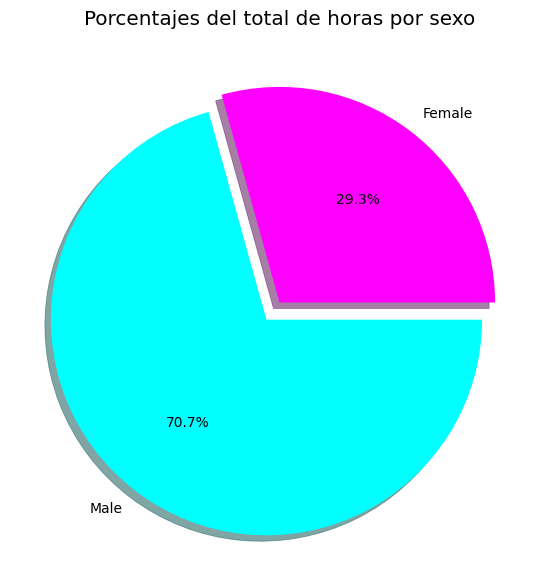

In [11]:
dfGroupSex = dfAmericanIncomeGraficos.groupby(['sex'])
dfGroupSexSum = dfGroupSex.sum(numeric_only=True)

figHorasSexo, axHorasSexo = plt.subplots(figsize =(10, 7))
axHorasSexo.pie(dfGroupSexSum['horasTrabajadasTotales'],
                labels = dfGroupSexSum.index,
                shadow=True,
                explode=[0, 0.1],
                colors=['fuchsia', 'cyan'],
                autopct='%1.1f%%')
axHorasSexo.set_title('Porcentajes del total de horas por sexo')

Podemos ver que falta inclución del sexo femenino en el reparto de horas trabajadas ya que no llega al 30%.

### 2. ¿Como es la distribución de horas según el tipo de ingreso ('<=50K' o '>50K') que tiene cada género?

#### a. Porcentaje Horas por sexo para ingresos >50K anuales
filtramos el dataset y solo nos quedamos con los registros que contengan el valor '>50K' en la columna 'income' y luego creamos un nuevo dataset donde a lo anterior lo agrupamos por la columna 'sex'

Text(0.5, 1.0, 'Porcentaje Horas por sexo para ingresos >50K anuales')

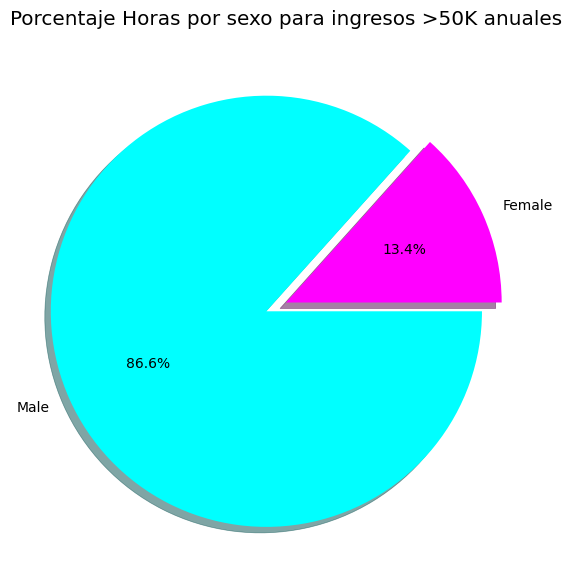

In [12]:
dfMayores50 = dfAmericanIncomeGraficos.query("income == '>50K'")
dfGroupMayores50Sex = dfMayores50.groupby(['sex'])
dfGroupMayores50SexSum = dfGroupMayores50Sex.sum(numeric_only=True)

figHorasMayores50Sexo, axHorasMayores50Sexo = plt.subplots(figsize =(10, 7))
axHorasMayores50Sexo.pie(dfGroupMayores50SexSum['horasTrabajadasTotales'],
                labels = dfGroupMayores50SexSum.index,
                shadow=True,
                explode=[0, 0.1],
                colors=['fuchsia', 'cyan'],
                autopct='%1.1f%%')
axHorasMayores50Sexo.set_title('Porcentaje Horas por sexo para ingresos >50K anuales')

Lo que podemos ver es que el sexo masculino es el que tiene mas acceso a los trabajos con mayores ingresos y es mas marcada la falta de inclución de la mujer.

#### b. Porcentaje Horas por sexo para ingresos <=50K anuales
Como en el gráfico anterior se filtro el dataset original y solo se utilizaron los registros con 'income' '<=50K' agrupandolos luego por el campo 'sex'

Text(0.5, 1.0, 'Porcentaje Horas por sexo para ingresos <=50K anuales')

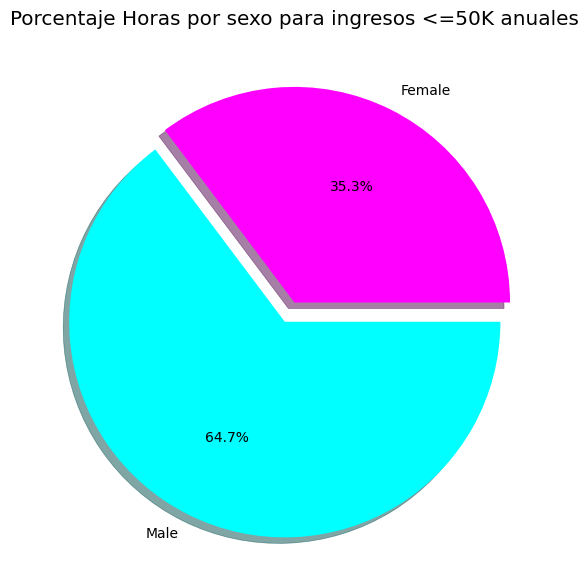

In [13]:
dfMenores50 = dfAmericanIncomeGraficos.query("income == '<=50K'")
dfGroupManores50Sex = dfMenores50.groupby(['sex'])
dfGroupManores50SexSum = dfGroupManores50Sex.sum(numeric_only=True)

figHorasManores50Sexo, axHorasManores50Sexo = plt.subplots(figsize =(10, 7))
axHorasManores50Sexo.pie(dfGroupManores50SexSum['horasTrabajadasTotales'],
                labels = dfGroupManores50SexSum.index,
                shadow=True,
                explode=[0, 0.1],
                colors=['fuchsia', 'cyan'],
                autopct='%1.1f%%')
axHorasManores50Sexo.set_title('Porcentaje Horas por sexo para ingresos <=50K anuales')

Como era de esperar por lo visto en el los dos diagramas de tortas anteriores las mujeres tienen mas acceso a trabajos menos remunerados. No hay gran disperción ya que apenas supera el 35% en ingresos '<=50K', en la distribución general teniamos 29,3% y 13,4% para los mayores ingresos.

### 3. ¿Cual es el promedio de horas trabajadas por raza?
En esta pregunta lo que queremos ver es la cantidad de horas que trabaja cada raza, lo que hacemos es agrupan los registros por el campo 'race' y luego crear un dataset nuevo sumariznado los campos numéricos, el que nos interesa es 'horasTrabajadasTotales' (Cantidad de horas total) al cual lo dividiremos por 'fnlwgt' (cantidad total de los agrupados).

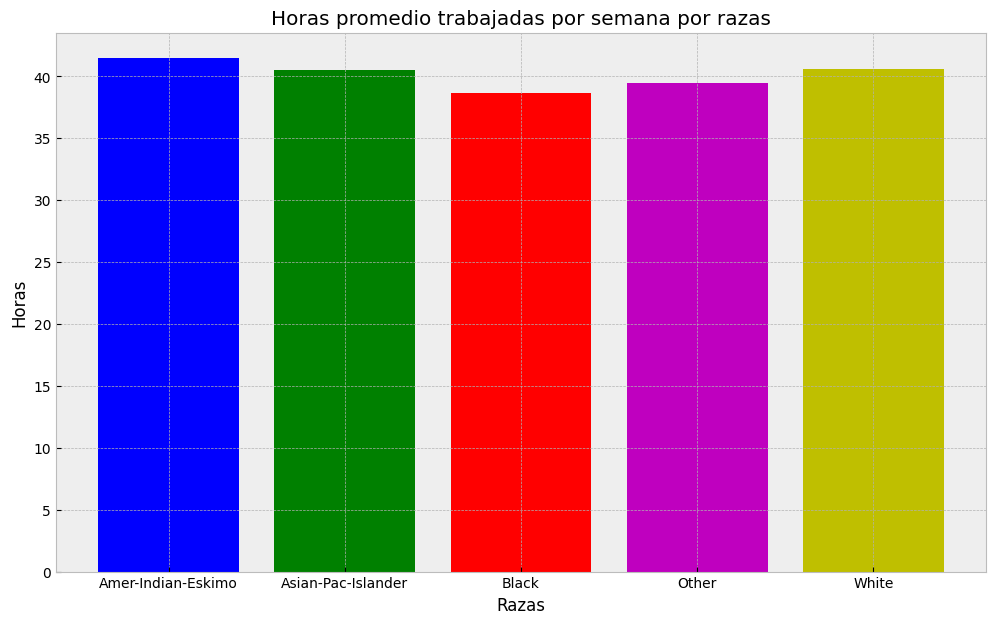

In [14]:
dfGroupRace = dfAmericanIncomeGraficos.groupby(['race'])
dfGroupRaceSum = dfGroupRace.sum(numeric_only=True)

figHorasRace, axHorasRace = plt.subplots(figsize =(12, 7))
axHorasRace.bar(x = dfGroupRaceSum.index, height = (dfGroupRaceSum['horasTrabajadasTotales'] / dfGroupRaceSum['fnlwgt']), color = ['b', 'g', 'r', 'm', 'y'])

axHorasRace.set_title('Horas promedio trabajadas por semana por razas')
axHorasRace.set_xlabel('Razas')
axHorasRace.set_ylabel('Horas')
axHorasRace.set_yscale('linear')

Podemos ver que el promedio de horas por raza es muy similar para todas, al rededor de 40 horas.

### 4. ¿Como es la distribución de personas registradas por razas separada por sexos?
creamos un dataset con la cantidad de personas por registro, 'sex' y 'race' y lo agrupamos por 'sex' y 'race' para graficar como es la distribución de genero por raza en el total de las personas registradas en el dataset original.

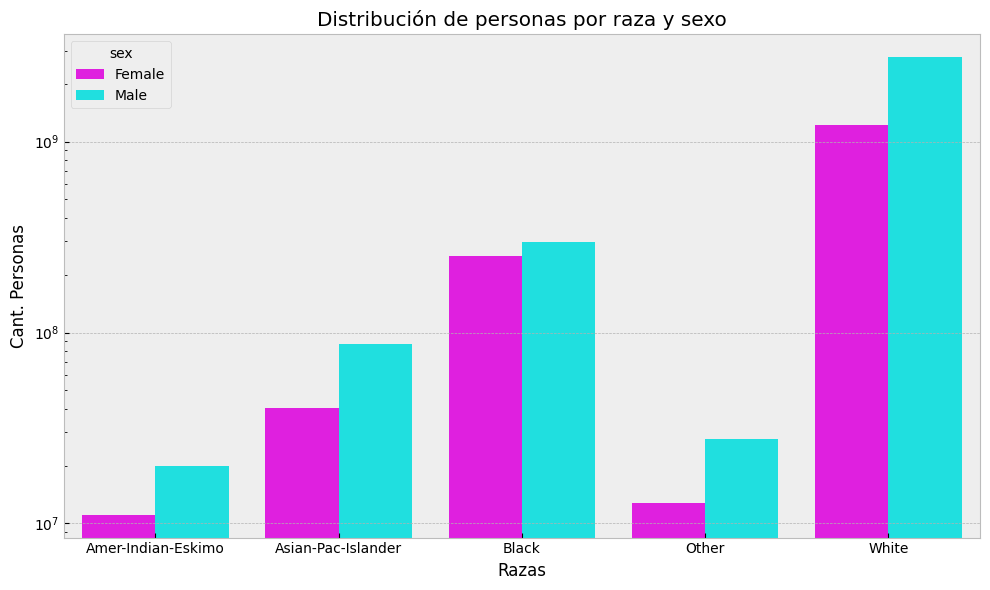

In [15]:
dfRazasXSexos = dfAmericanIncomeGraficos[['fnlwgt', 'sex', 'race']].groupby(by=['sex', 'race']).sum(['fnlwgt']).reset_index()
figRazasXSexos, axRazasXSexos = plt.subplots(figsize=(10, 6))

colorRazasXSexos = ['fuchsia', 'cyan']
sns.barplot(ax=axRazasXSexos,
            y='fnlwgt',
            x='race',
            hue='sex',
            data=dfRazasXSexos,
            palette = colorRazasXSexos,)

axRazasXSexos.set_title('Distribución de personas por raza y sexo')
axRazasXSexos.set_xlabel('Razas')
axRazasXSexos.set_ylabel('Cant. Personas')
axRazasXSexos.set_yscale('log')
figRazasXSexos.tight_layout()

podemos ver que para todas las razas es el hombre el que tiene mas acceso al trabajo registrado aunque no la diferencia con la mujer no es demasiado significativa, siendo la raza Black la que tiene la menor de las diferencias.

5. ¿Como se la distribución de personas de las distintas razas y generos pero mostrando la edad?

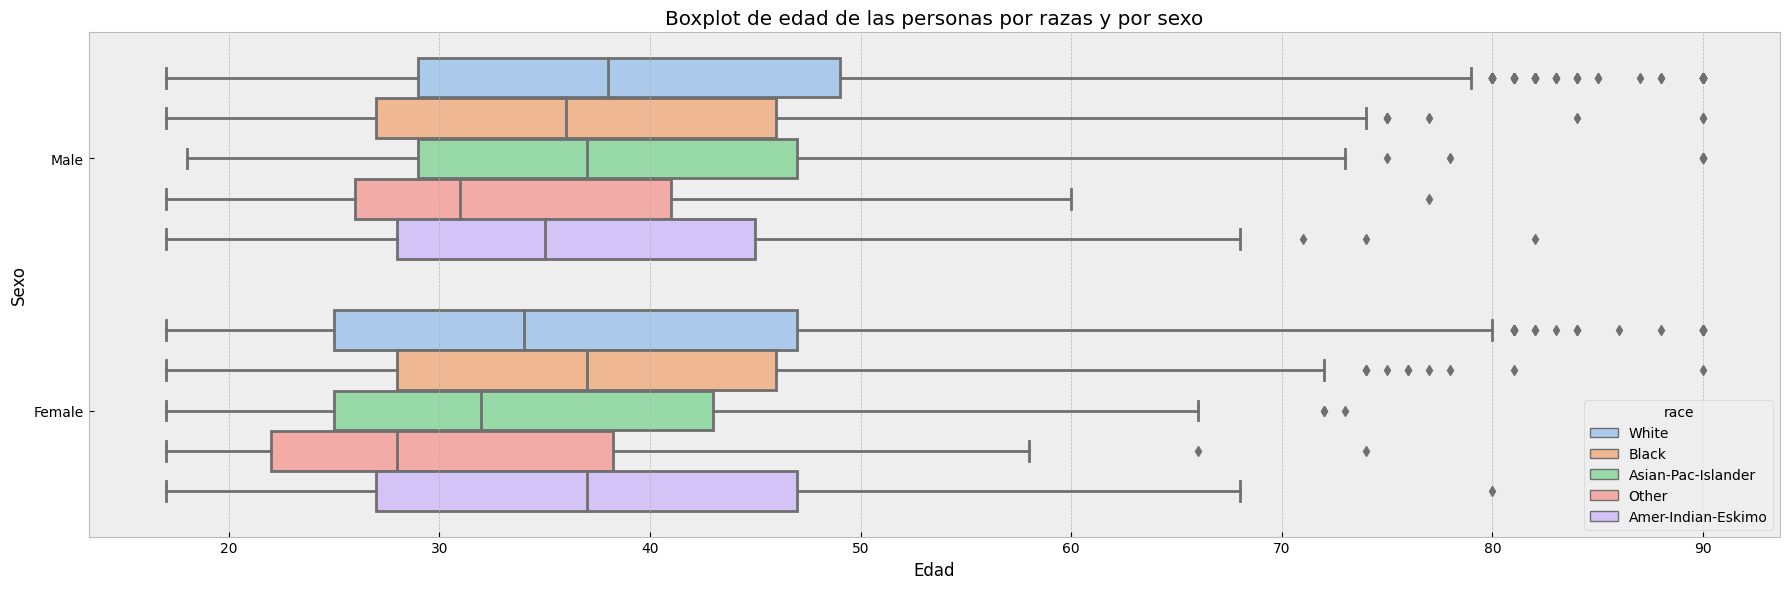

In [16]:
dfEdadRazaSemana = dfAmericanIncomeGraficos[['age', 'race', 'sex']]
figEdadRazaSemana, axEdadRazaSemana = plt.subplots(figsize=(18,6))

sns.boxplot(data = dfEdadRazaSemana,
            y = 'sex',
            x = 'age',
            hue = 'race',
            ax = axEdadRazaSemana,
            palette = sns.color_palette('pastel', 5))
axEdadRazaSemana.set_title('Boxplot de edad de las personas por razas y por sexo')
axEdadRazaSemana.set_ylabel('Sexo')
axEdadRazaSemana.set_xlabel('Edad')
figEdadRazaSemana.tight_layout()

vemos que:
- en las razas White, Asian-Pac-Islander y Others la mediana, y los cuatiles 1 y 3 son menores en mujeres que en hombres, esto por trabajar menos horas por semana en esos grupos.
- todas las razas y sexo tienen el mínimo inlier de 18 años excepto en los hombres de Asian-Pac-Islander que es de 19 aprox.
- en Others vemos que es el grupo que menos horas trabajadas por semana tiene por los máximos de inliers esta en las 60 horas aproximadamente para ambos sexos con algunos muy pocos casos de outliers superior.
- White en ambos géneros es el que mas horas trabajadas tiene con un cuartil 3 mayor y el máximo inlier superior a las demás razas y con varios casos de outliers superiores.

### 6. ¿Cual es la distribución de horas trabajadas según la edad de las personas?
creamos un dataset nuevo a partir del original donde nos quedamos solamante con 'age' y 'horasTrabajadasTotales' y agrupamos los registros por 'age' y sumamos todos los 'horasTrabajadasTotales' por ser cada registro un agrupado.

Text(0, 0.5, 'Frecuencia')

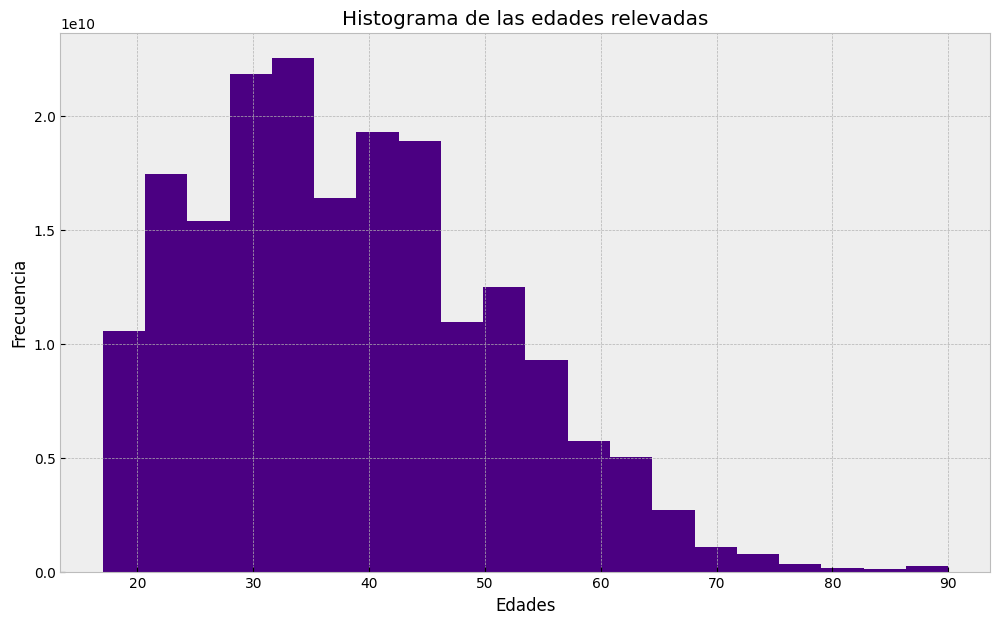

In [17]:
dfHistEdad = dfAmericanIncomeGraficos[['horasTrabajadasTotales', 'age']].groupby(by=['age']).sum(['horasTrabajadasTotales']).reset_index()
figEdadesRelev, axEdadesRelev = plt.subplots(figsize =(12, 7))
axEdadesRelev.hist(x = dfHistEdad['age'],
                   bins = 20,
                   density = False,
                   orientation = 'vertical',
                   histtype = 'bar',
                   color = 'indigo',
                   weights = dfHistEdad['horasTrabajadasTotales'],)
axEdadesRelev.set_title('Histograma de las edades relevadas')
axEdadesRelev.set_xlabel('Edades')
axEdadesRelev.set_ylabel('Frecuencia')

A pesar de tener números muy grandes, por eso son expresados en forma exponencial, vemos que las edad desde 18 a aproximadamente 54 años son los que aportan horas superiores a una media y a medida que incrementan las edades disminuye la cantidad de horas que trabaja el grupo etario y tenemos registro de personas que trabajan hasta los 90 años.

#### 7. ¿Como son los ingresos según el nivel de educación?
generamos un histograma donde el eje Y serán lo niveles de educación y por cada uno separaremos los que sean mayor o menos a 50K como 'income'

<Axes: xlabel='Count', ylabel='education'>

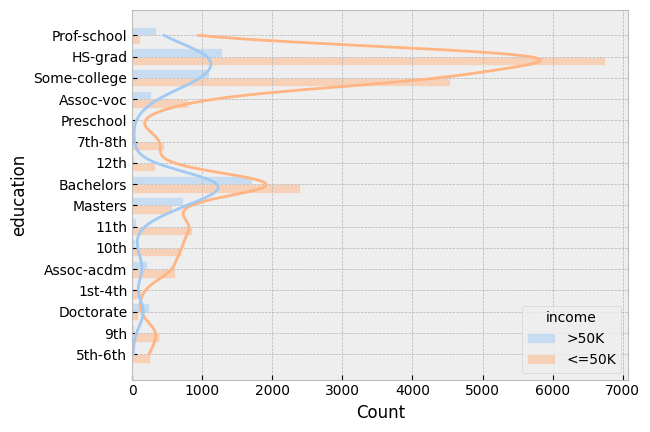

In [18]:
sns.histplot(data = dfAmericanIncomeGraficos,
            y = 'education',
            hue = 'income',
            multiple = 'dodge',
            shrink = .8,
            binwidth = 5,
            kde = True,
            palette = sns.color_palette('pastel', 2))

lo que vemos es que para ingresos '<=50K' en gran parte los graduados de preparatoria o con algún tipo de educación superior, seguidos por los de bachilerato, en cambio para los de ingresos superiores vemos que pertenecen a los que alcanzan niveles de preparatoria, educación superior o algunas maestria.

#### 8. sobre el nivel de educación ¿Que tipo de tareas realizan los de mayor ingreso? ¿y que ocupaciones tiene?
filtrando el dataset original por lo que tienen mayores ingresos, '>50K' en la columna 'income' y lo graficamos en una grilla de gráficos de barras, cada uno corresponde a un nivel de educación, mostramos las cantidades del tipo de trabajo realizado a cada nivel.

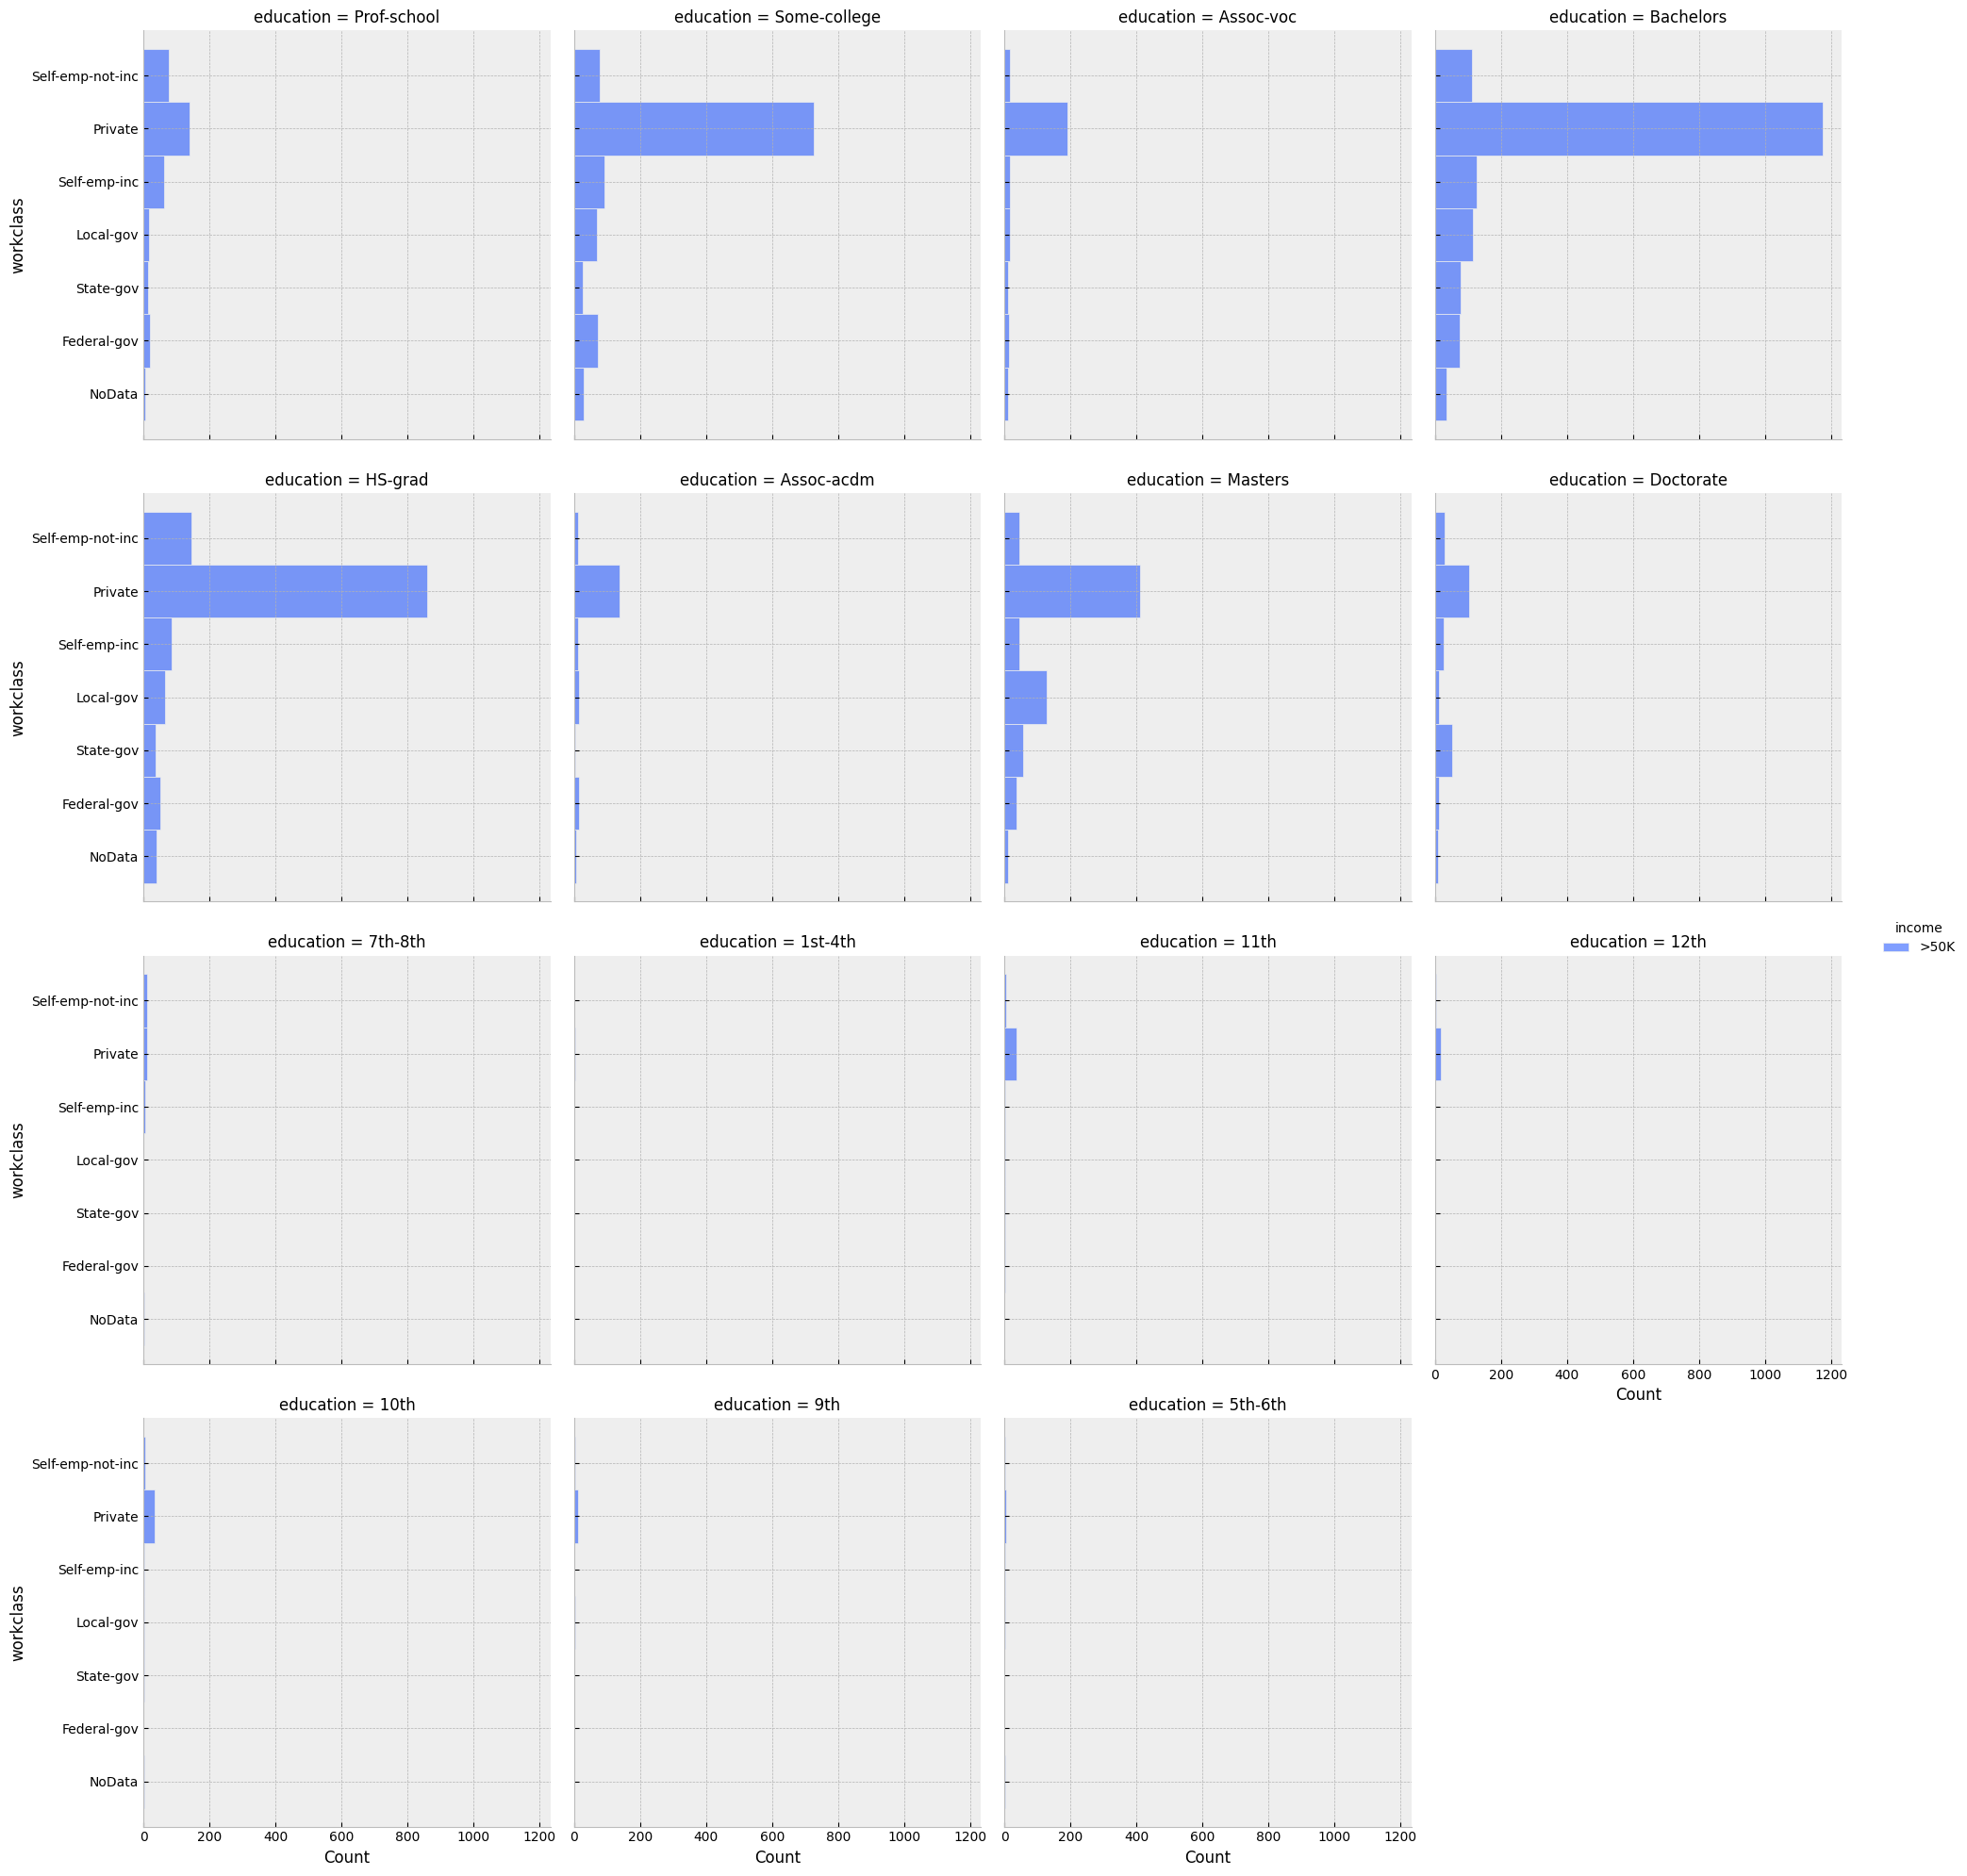

In [19]:
dfMayores50Sns = dfAmericanIncomeGraficos.query("income == '>50K'")
sns.displot(data = dfMayores50Sns,
            y = "workclass",
            hue = "income",
            col = "education",
            palette = sns.color_palette('bright', 1),
            col_wrap = 4)

vemos que para todos lo niveles de educación la actividad privada es la que tiene maor cantidad de casos y se ve una mayor distribución en los tipo de tareas para los niveles "Bachelors", "some-college", "Master" y "HD-grad"

en este caso filtramos los registros con mayores ingresos ("income == '>50K'") y creamos un scatterplot donde en el eje Y vemos las ocupaciones y en el X el nivel de educación. La intensidad y tamaño de los circulos tiene que ver con la cantidad de ocurrencias.

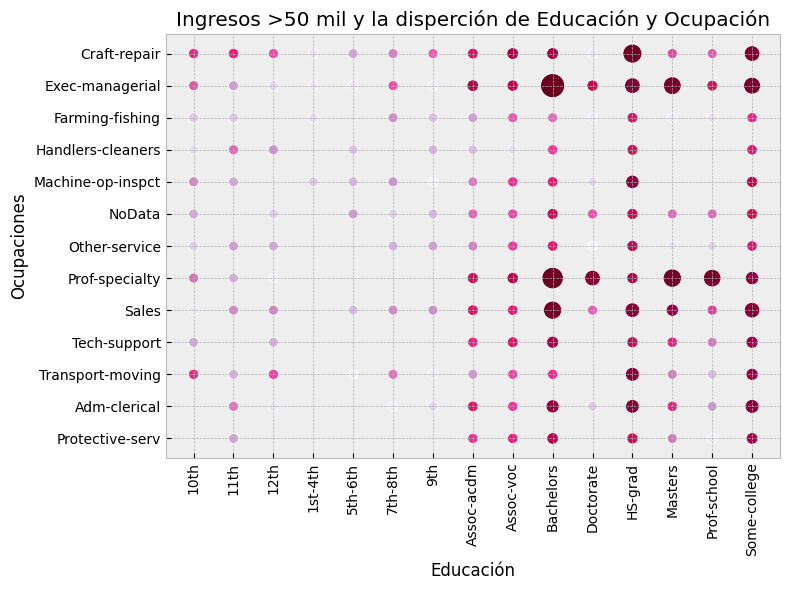

In [20]:
dfMayoresIngresos = pd.DataFrame(dfAmericanIncomeGraficos[['fnlwgt', 'income', 'education', 'occupation']].groupby(by=['income', 'education', 'occupation']).sum(['fnlwgt']).query("income == '>50K'").reset_index())

figMayoresIngresos, axMayoresIngresos = plt.subplots(figsize=(8, 6))
sns.scatterplot(data = dfMayoresIngresos,
                x = 'education',
                y = 'occupation',
                ax = axMayoresIngresos,
                palette = sns.color_palette('PuRd', 158),
                hue = 'fnlwgt',
                legend= False,
                size = 'fnlwgt',
                sizes=(50, 300))
axMayoresIngresos.tick_params(axis='x', which='major', labelrotation=90)
axMayoresIngresos.set_title('Ingresos >50 mil y la disperción de Educación y Ocupación')
axMayoresIngresos.set_xlabel('Educación')
axMayoresIngresos.set_ylabel('Ocupaciones')
figMayoresIngresos.tight_layout()

lo que vemos es que en las ocupaciones "exec-managerial", "prof-speciality", "sales" y "craft-repair" hay mayor cantidad de personas con ingresos superiores y que corresponden ha haber llegado a los niveles de educación "bachelors", "HD-grad", "master", "prof-school" y "some-colleage" con lo que podemos suponer que por haber llegado a niveles mas alto de estudio es los que les da la posibilidad de tener mayores ingresos.

#### 9. sobre los niveles de educación ¿Como es la distribución por edades?
por medio de un histograma en forma de mapa de calor agrupamos el dataset por edad y nivel de educación y hacemos la sumatoria del campo que representa la cantidad de personas por agripación.

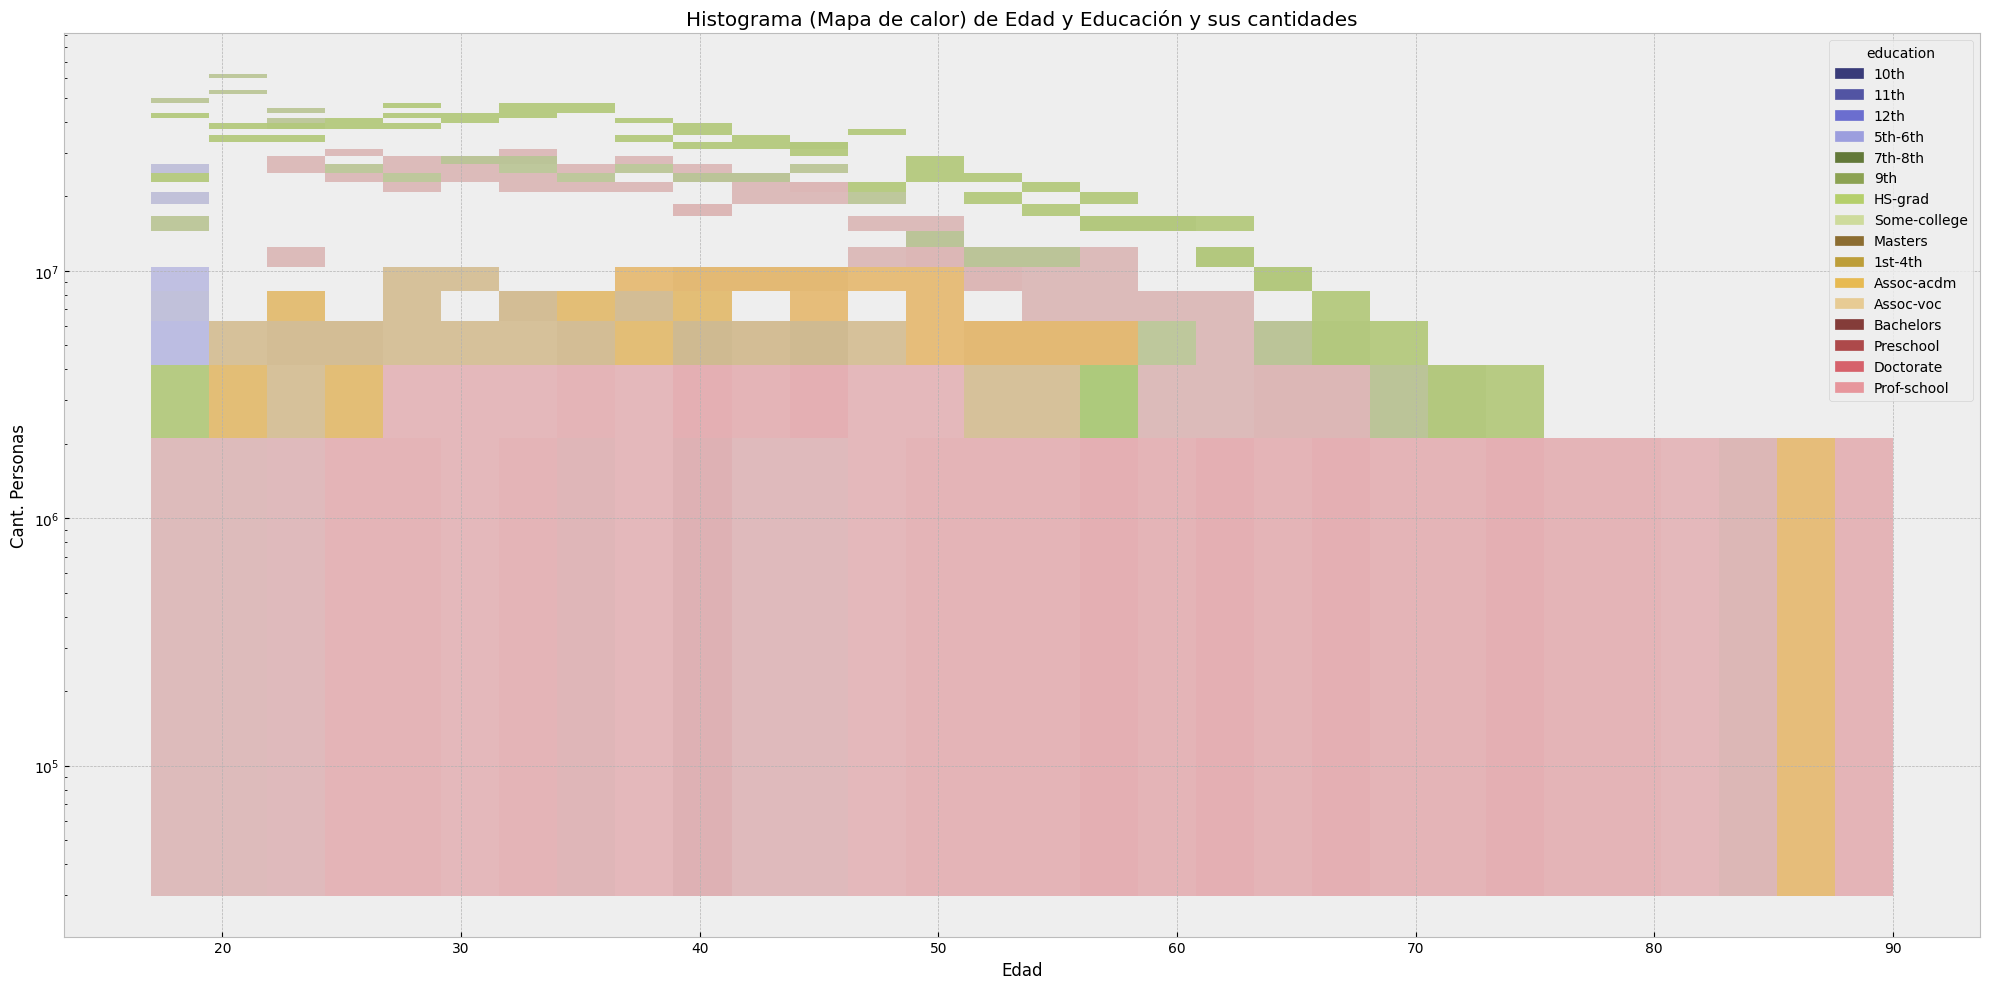

In [21]:
dfEdades = dfAmericanIncomeGraficos[['fnlwgt', 'age', 'education']].groupby(by=['age', 'education']).sum(['fnlwgt']).reset_index()
figEdades, axEdades = plt.subplots(figsize=(20, 10))

sns.histplot(ax = axEdades,
            x ='age',
            y ='fnlwgt',
            hue ='education',
            bins = 30,
            data = dfEdades,
            palette = sns.color_palette('tab20b', 16))
axEdades.set_title('Histograma (Mapa de calor) de Edad y Educación y sus cantidades')
axEdades.set_xlabel('Edad')
axEdades.set_ylabel('Cant. Personas')
axEdades.set_yscale('log')
figEdades.tight_layout()

podemos ver que entre los 18 y 75 años la mayor cantidad de personas pertenecen a los ancanzan los niveles de "some-college" y "HS-Grad", para mayores a esa edad vemos que las personas pertenecen a los grupos "Assoc-acdm", "Assoc-voc" y "Prof-school".

#### 10. ¿Como es la distribución de ocupaciones para los nacidos en Estados Unidos y los extranjeros?
creando 2 scatterplots agrupando por los campos 'Origen', 'education' y 'ocupation' y sumando las cantidades de personas que representa cada agrupamiento 'fnlwgt' es que veremos según el tamaño e intensidad del circulo. Origen es un campo calculado para diferencia de manera mas sencilla si es extranjero o no.

##### a. extranjeros

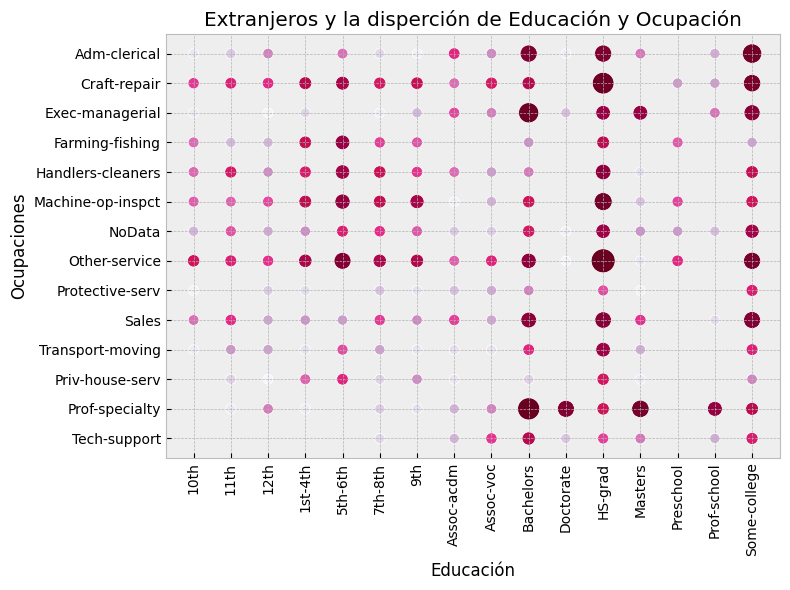

In [22]:
dfOrigenExtranjero = pd.DataFrame(dfAmericanIncomeGraficos[['fnlwgt', 'origen', 'education', 'occupation']].groupby(by=['origen', 'education', 'occupation']).sum(['fnlwgt']).query("origen == 'Extranjero'").reset_index())
figOrigenExt, axOrigenExt = plt.subplots(figsize=(8, 6))

sns.scatterplot(data = dfOrigenExtranjero,
                x = 'education',
                y = 'occupation',
                ax = axOrigenExt,
                palette = sns.color_palette('PuRd', 180),
                hue = 'fnlwgt',
                legend= False,
                size = 'fnlwgt',
                sizes=(50, 300))
axOrigenExt.tick_params(axis='x', which='major', labelrotation=90)
axOrigenExt.set_title('Extranjeros y la disperción de Educación y Ocupación')
axOrigenExt.set_xlabel('Educación')
axOrigenExt.set_ylabel('Ocupaciones')
figOrigenExt.tight_layout()

vemos que para los extranjeros en los niveles de estudio donde se ve la mas alta distribución es "HS-grad", "some-college" y "bachelors" y sobre las ocupaciones "craft-repair", "other-services", "adm-clerical", "prof-specialty" y "exec-managerial".

##### b. Estados Unidos

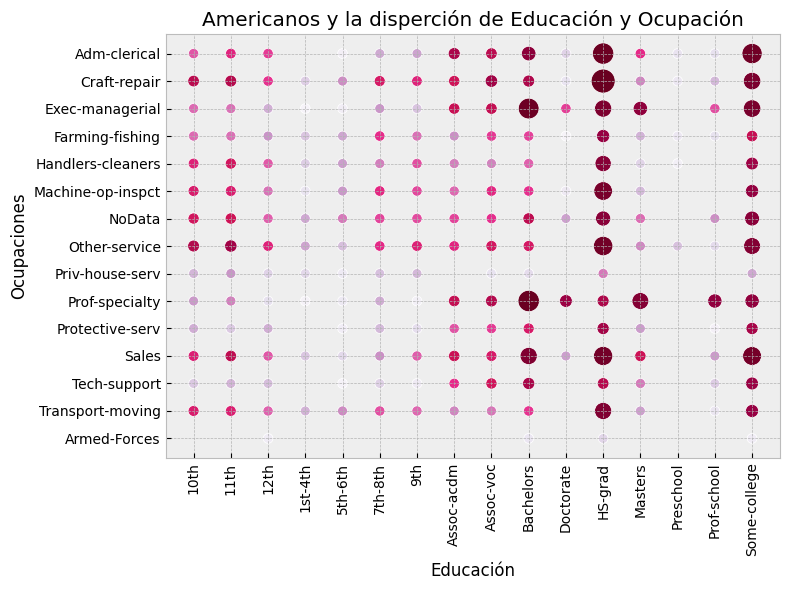

In [23]:
dfOrigenAmericanos = pd.DataFrame(dfAmericanIncomeGraficos[['fnlwgt', 'origen', 'education', 'occupation']].groupby(by=['origen', 'education', 'occupation']).sum(['fnlwgt']).query("origen == 'Estados Unidos'").reset_index())
figOrigenAmer, axOrigenAmer = plt.subplots(figsize=(8, 6))

sns.scatterplot(data = dfOrigenAmericanos,
                x = 'education',
                y = 'occupation',
                ax = axOrigenAmer,
                palette = sns.color_palette('PuRd', 205),
                hue = 'fnlwgt',
                legend= False,
                size = 'fnlwgt',
                sizes=(50, 300))
axOrigenAmer.tick_params(axis='x', which='major', labelrotation=90)
axOrigenAmer.set_title('Americanos y la disperción de Educación y Ocupación')
axOrigenAmer.set_xlabel('Educación')
axOrigenAmer.set_ylabel('Ocupaciones')
figOrigenAmer.tight_layout()

lo que vemos sobre los nacidos en Estados Unidos que para los niveles de estudio "HS-grad", "some-college" y "bachelors" es donde se ve que hay mayor cantidad de personas con ingresos mayores y las ocupaciones que sobresalen son "prof-specialty", "exec-manageria", "craft-repair", "adm-clerical" y "sales".

#### 11. ¿Como es la distribución de horas trabajadas por semana?

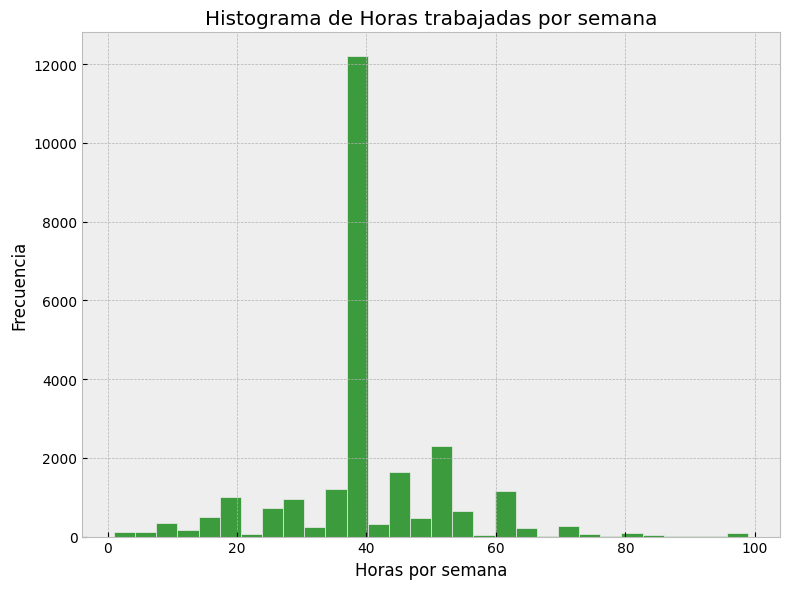

In [24]:
figHorasSemana, axHorasSemana = plt.subplots(figsize=(8, 6))
sns.histplot(data = dfAmericanIncomeGraficos['hours.per.week'],
            bins = 30,
            color = 'g')
axHorasSemana.set_title("Histograma de Horas trabajadas por semana")
axHorasSemana.set_ylabel("Frecuencia")
axHorasSemana.set_xlabel("Horas por semana")
figHorasSemana.tight_layout()

vemos que es muy marcado que 40 horas semanales de trabajo tiene la mayor frecuencia, también podemos ver que hay varias frecuencias que sobresalen entre las 40 y 60 horas.

## Método de feature selection  para reducción de dimensionalidad del dataset

### Removing features with low variance - VarianceThreshold

In [25]:
dfAmericanIncome.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             25000 non-null  int64 
 1   workclass       25000 non-null  object
 2   fnlwgt          25000 non-null  int64 
 3   education       25000 non-null  object
 4   education.num   25000 non-null  int64 
 5   marital.status  25000 non-null  object
 6   occupation      25000 non-null  object
 7   relationship    25000 non-null  object
 8   race            25000 non-null  object
 9   sex             25000 non-null  object
 10  capital.gain    25000 non-null  int64 
 11  capital.loss    25000 non-null  int64 
 12  hours.per.week  25000 non-null  int64 
 13  native.country  25000 non-null  object
 14  income          25000 non-null  object
dtypes: int64(6), object(9)
memory usage: 2.9+ MB


In [26]:
dfAmericanIncome_type = dfAmericanIncome.select_dtypes(include= [object])
dfAmericanIncome_type.columns

Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country', 'income'],
      dtype='object')

In [27]:
dfAmericanIncome_type

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
0,Self-emp-not-inc,Prof-school,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,>50K
1,Private,HS-grad,Divorced,Craft-repair,Not-in-family,White,Female,United-States,<=50K
2,Private,Some-college,Married-civ-spouse,Adm-clerical,Husband,White,Male,United-States,>50K
3,Private,Assoc-voc,Married-civ-spouse,Other-service,Husband,White,Male,United-States,>50K
4,NoData,Preschool,Married-civ-spouse,NoData,Wife,White,Female,Mexico,<=50K
...,...,...,...,...,...,...,...,...,...
24995,Private,Some-college,Never-married,Adm-clerical,Not-in-family,White,Female,United-States,<=50K
24996,Local-gov,Bachelors,Never-married,Prof-specialty,Not-in-family,White,Female,United-States,<=50K
24997,Federal-gov,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,NoData,>50K
24998,Private,Bachelors,Never-married,Prof-specialty,Not-in-family,White,Female,United-States,<=50K


In [28]:
le = LabelEncoder()
dfAmericanIncome_le = dfAmericanIncome_type.apply(le.fit_transform)
dfAmericanIncome_le

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
0,6,14,2,10,0,4,1,38,1
1,4,11,0,2,1,4,0,38,0
2,4,15,2,0,0,4,1,38,1
3,4,8,2,8,0,4,1,38,1
4,3,13,2,7,5,4,0,24,0
...,...,...,...,...,...,...,...,...,...
24995,4,15,4,0,1,4,0,38,0
24996,1,9,4,10,1,4,0,38,0
24997,0,9,2,10,0,4,1,26,1
24998,4,9,4,10,1,4,0,38,0


In [29]:
enc = OneHotEncoder()
enc.fit(dfAmericanIncome_le)

OneHotEncoder()

In [30]:
oneHotLabels = enc.transform(dfAmericanIncome_le).toarray()
oneHotLabels.shape

(25000, 103)

In [31]:
oneHotLabels

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [32]:
type(oneHotLabels)

numpy.ndarray

In [33]:
enc.get_feature_names_out()

array(['workclass_0', 'workclass_1', 'workclass_2', 'workclass_3',
       'workclass_4', 'workclass_5', 'workclass_6', 'workclass_7',
       'workclass_8', 'education_0', 'education_1', 'education_2',
       'education_3', 'education_4', 'education_5', 'education_6',
       'education_7', 'education_8', 'education_9', 'education_10',
       'education_11', 'education_12', 'education_13', 'education_14',
       'education_15', 'marital.status_0', 'marital.status_1',
       'marital.status_2', 'marital.status_3', 'marital.status_4',
       'marital.status_5', 'marital.status_6', 'occupation_0',
       'occupation_1', 'occupation_2', 'occupation_3', 'occupation_4',
       'occupation_5', 'occupation_6', 'occupation_7', 'occupation_8',
       'occupation_9', 'occupation_10', 'occupation_11', 'occupation_12',
       'occupation_13', 'occupation_14', 'relationship_0',
       'relationship_1', 'relationship_2', 'relationship_3',
       'relationship_4', 'relationship_5', 'race_0', 'race_1', '

In [34]:
dfOneHotEncoder = pd.DataFrame(oneHotLabels, columns = enc.get_feature_names_out())
dfOneHotEncoder

,workclass_0,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,education_0,...,native.country_33,native.country_34,native.country_35,native.country_36,native.country_37,native.country_38,native.country_39,native.country_40,income_0,income_1
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
24996,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
24997,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
24998,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [35]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(0.8 * (1 - 0.8)))
sel_feature = sel.fit_transform(dfOneHotEncoder)
sel_feature

array([[0., 0., 0., ..., 1., 0., 1.],
       [1., 1., 0., ..., 0., 1., 0.],
       [1., 0., 1., ..., 1., 0., 1.],
       ...,
       [0., 0., 0., ..., 1., 0., 1.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 1., 0.]])

In [36]:
sel_feature.shape

(25000, 11)

In [37]:
sel.feature_names_in_.shape

(103,)

In [38]:
sel.get_feature_names_out()

array(['workclass_4', 'education_11', 'education_15', 'marital.status_2',
       'marital.status_4', 'relationship_0', 'relationship_1', 'sex_0',
       'sex_1', 'income_0', 'income_1'], dtype=object)

In [39]:
dfFeatureSelec = pd.DataFrame(sel_feature, columns = sel.get_feature_names_out())
dfFeatureSelec

,workclass_4,education_11,education_15,marital.status_2,marital.status_4,relationship_0,relationship_1,sex_0,sex_1,income_0,income_1
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
24995,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
24996,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
24997,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
24998,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0


***conclusión***: primero se transformaron a dummies todas las características no numéricas *('income','workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country', 'origen')* utilizando `OneHotEncoder` y luego se aplico el método `VarianceThreshold` con un `threshold=(0.8 * (1 - 0.8))`' como lo que paso de 103 columnas con los dummies a 11.

### Univariate feature selection - SelectKBest

In [40]:
dfAmericanIncome.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,25000.00000,2.500000e+04,25000.000000,25000.000000,25000.000000,25000.000000
mean,38.60916,1.896611e+05,10.076320,1083.144040,87.489800,40.442800
std,13.68660,1.054713e+05,2.576967,7321.971568,402.830246,12.309706
min,17.00000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.00000,1.179830e+05,9.000000,0.000000,0.000000,40.000000
50%,37.00000,1.782110e+05,10.000000,0.000000,0.000000,40.000000
75%,48.00000,2.370682e+05,12.000000,0.000000,0.000000,45.000000
max,90.00000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [41]:
dfAmericanIncomeNumericasKBest = dfAmericanIncome[['age', 'fnlwgt', 'education.num', 'capital.gain',	'capital.loss',	'hours.per.week']]

x = dfAmericanIncomeNumericasKBest.drop(columns = ['hours.per.week'])
y = dfAmericanIncomeNumericasKBest['hours.per.week']

sel_KBest = SelectKBest(f_classif, k = 4)
x_sel_KBest = sel_KBest.fit_transform(x, y)
x_sel_KBest

array([[   40,    15, 99999,     0],
       [   30,     9,     0,     0],
       [   46,    10,     0,     0],
       ...,
       [   38,    13,     0,     0],
       [   23,    13,     0,     0],
       [   60,     6,     0,     0]])

In [42]:
x_sel_KBest.shape

(25000, 4)

In [43]:
sel_KBest.feature_names_in_.shape

(5,)

In [44]:
sel_KBest.get_feature_names_out()

array(['age', 'education.num', 'capital.gain', 'capital.loss'],
      dtype=object)

In [45]:
dfSelectKBest = pd.DataFrame(x_sel_KBest, columns = sel_KBest.get_feature_names_out())
dfSelectKBest

,age,education.num,capital.gain,capital.loss
0,40,15,99999,0
1,30,9,0,0
2,46,10,0,0
3,32,11,0,0
4,54,1,0,0
...,...,...,...,...
24995,40,10,0,0
24996,31,13,0,0
24997,38,13,0,0
24998,23,13,0,0


***conclusión***: utilizando SelectKBest sobre las caracteristicas numericas, 6 dentro del data set, elegimos quedarnos solo con 4 y a aplicar el método el resultado es que quedaron age, education.num, capital.gain y capital.loss.

## Algoritmo de regresion y clasificación

### Regresión - LinearRregression

In [46]:
dfAmericanIncomeLinReg = dfAmericanIncome.copy()

In [47]:
dfAmericanIncomeLinReg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             25000 non-null  int64 
 1   workclass       25000 non-null  object
 2   fnlwgt          25000 non-null  int64 
 3   education       25000 non-null  object
 4   education.num   25000 non-null  int64 
 5   marital.status  25000 non-null  object
 6   occupation      25000 non-null  object
 7   relationship    25000 non-null  object
 8   race            25000 non-null  object
 9   sex             25000 non-null  object
 10  capital.gain    25000 non-null  int64 
 11  capital.loss    25000 non-null  int64 
 12  hours.per.week  25000 non-null  int64 
 13  native.country  25000 non-null  object
 14  income          25000 non-null  object
dtypes: int64(6), object(9)
memory usage: 2.9+ MB


In [48]:
X = dfAmericanIncomeLinReg.drop('income', axis = 1)
y = dfAmericanIncomeLinReg['income']

le = LabelEncoder()
X_encoded = X.apply(le.fit_transform)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size = 0.1, random_state = 42)

models = {
    'Random Forest': RandomForestClassifier(n_estimators = 100, random_state = 42),
    'Logistic Regression': LogisticRegression(random_state = 42)
}

for model_name, model in models.items():
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  print(f"___________ {model_name}____________")
  print(classification_report(y_test, y_pred))
  print()

___________ Random Forest____________
              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      1883
        >50K       0.74      0.63      0.68       617

    accuracy                           0.85      2500
   macro avg       0.81      0.78      0.79      2500
weighted avg       0.85      0.85      0.85      2500


___________ Logistic Regression____________
              precision    recall  f1-score   support

       <=50K       0.83      0.94      0.88      1883
        >50K       0.71      0.41      0.52       617

    accuracy                           0.81      2500
   macro avg       0.77      0.68      0.70      2500
weighted avg       0.80      0.81      0.79      2500




/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Confusion matrix

In [49]:
X = dfAmericanIncomeLinReg.drop('income', axis=1)
y = dfAmericanIncomeLinReg['income']

label_encoder = LabelEncoder()
y_numerical = label_encoder.fit_transform(y)

categorical_columns = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
X_encoded = pd.get_dummies(X, columns=categorical_columns)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_encoded)
#X_encoded

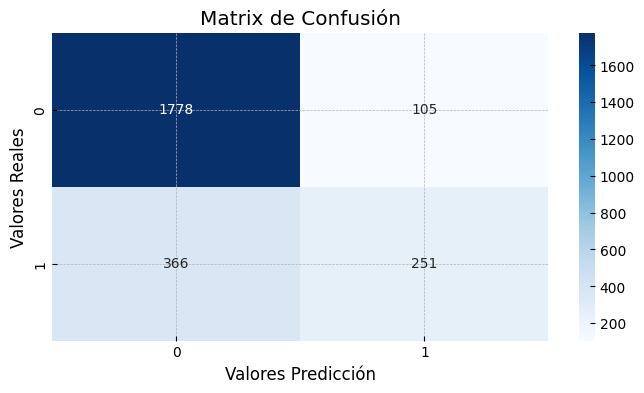

In [50]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Valores Reales')
plt.xlabel('Valores Predicción')
plt.title('Matrix de Confusión')
plt.show()

In [51]:
cm

array([[1778,  105],
       [ 366,  251]])

***conclusión***: luego de convertir las columnas categoricas en valores dummies y hacer una predicción con los valores de test obtuvimos que dimos:
- 1778 verdaderos positivos, o sea, que predijimos un income y lo era.
- 366 falsos negativos
- 105 falsos positovos y
- 251 verdaderos negativos

## Generar una evaluación de modelos apropiados para el problema de interés

Para ver como nos afecta el Underfitting y Overfitting vamos a analizarlo ejecutando 2 modelos (DecisionTreeRegressor y GradientBoostingRegressor) haciendo variaciones en los parámetros train_size y test_size

### DecisionTreeRegressor y GradientBoostingRegressor

#### Underfitting

##### train_size = 0.01 y test_size = 0.01

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


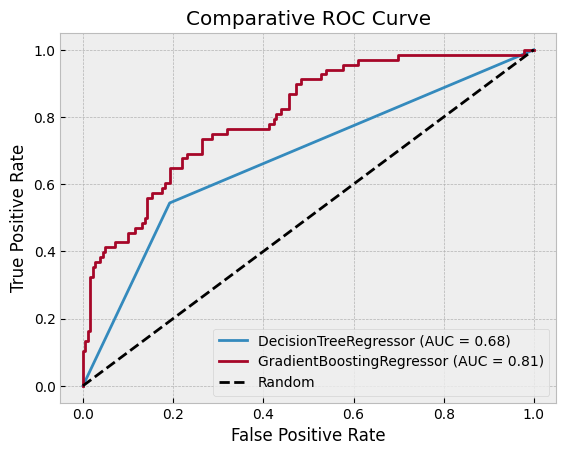

In [52]:
X = dfAmericanIncome.drop('income', axis=1)
y = dfAmericanIncome['income']

y_encoded = pd.get_dummies(y, drop_first=True)
X_encoded = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size = 0.01, train_size = 0.01, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_scaled)
X_test_imputed = imputer.transform(X_test_scaled)

X_train_imbalanced, y_train_imbalanced = resample(X_train_imputed, y_train, random_state=42)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_imputed)
X_test_pca = pca.transform(X_test_imputed)

models = [
    DecisionTreeRegressor(),
    GradientBoostingRegressor()
]

model_names = []
auc_scores = []
for model in models:
  model.fit(X_train_imputed, y_train)
  y_pred = model.predict(X_test_imputed)
  auc = roc_auc_score(y_test, y_pred)
  model_names.append(model.__class__.__name__)
  auc_scores.append(auc)
  fpr, tpr, _ = roc_curve(y_test, y_pred)
  plt.plot(fpr, tpr, label=f'{model.__class__.__name__} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label = 'Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparative ROC Curve')
plt.legend()
plt.show()

#### Normal fitting

##### train_size = 0.1 y test_size = 0.1

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


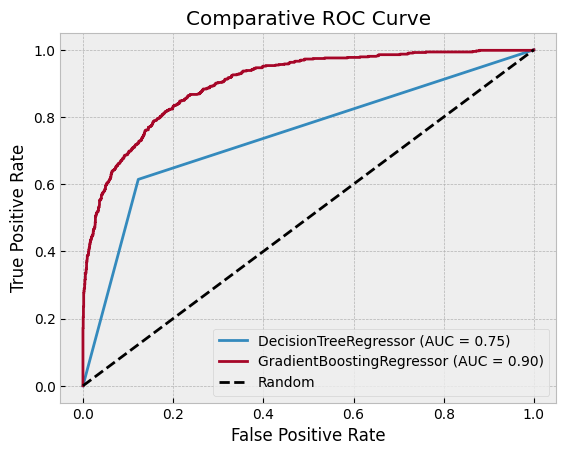

In [53]:
X = dfAmericanIncome.drop('income', axis=1)
y = dfAmericanIncome['income']

y_encoded = pd.get_dummies(y, drop_first=True)
X_encoded = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size = 0.1, train_size = 0.1, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_scaled)
X_test_imputed = imputer.transform(X_test_scaled)

X_train_imbalanced, y_train_imbalanced = resample(X_train_imputed, y_train, random_state=42)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_imputed)
X_test_pca = pca.transform(X_test_imputed)

models = [
    DecisionTreeRegressor(),
    GradientBoostingRegressor()
]

model_names = []
auc_scores = []
for model in models:
  model.fit(X_train_imputed, y_train)
  y_pred = model.predict(X_test_imputed)
  auc = roc_auc_score(y_test, y_pred)
  model_names.append(model.__class__.__name__)
  auc_scores.append(auc)
  fpr, tpr, _ = roc_curve(y_test, y_pred)
  plt.plot(fpr, tpr, label=f'{model.__class__.__name__} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label = 'Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparative ROC Curve')
plt.legend()
plt.show()

##### train_size = 0.2 y test_size = 0.2

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


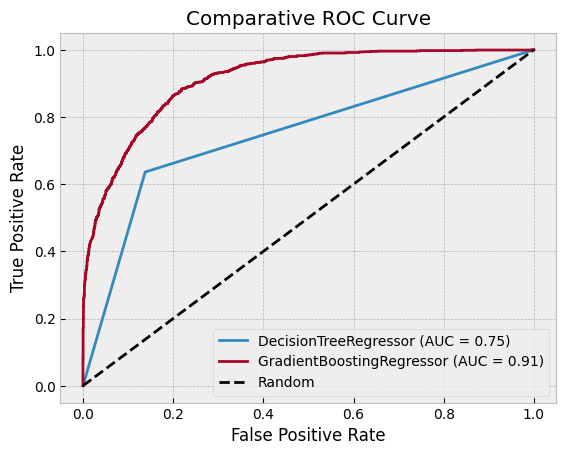

In [54]:
X = dfAmericanIncome.drop('income', axis=1)
y = dfAmericanIncome['income']

y_encoded = pd.get_dummies(y, drop_first=True)
X_encoded = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size = 0.2, train_size = 0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_scaled)
X_test_imputed = imputer.transform(X_test_scaled)

X_train_imbalanced, y_train_imbalanced = resample(X_train_imputed, y_train, random_state=42)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_imputed)
X_test_pca = pca.transform(X_test_imputed)

models = [
    DecisionTreeRegressor(),
    GradientBoostingRegressor()
]

model_names = []
auc_scores = []
for model in models:
  model.fit(X_train_imputed, y_train)
  y_pred = model.predict(X_test_imputed)
  auc = roc_auc_score(y_test, y_pred)
  model_names.append(model.__class__.__name__)
  auc_scores.append(auc)
  fpr, tpr, _ = roc_curve(y_test, y_pred)
  plt.plot(fpr, tpr, label=f'{model.__class__.__name__} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label = 'Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparative ROC Curve')
plt.legend()
plt.show()

#### Overfitting

##### train_size = 0.45 y test_size = 0.45

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


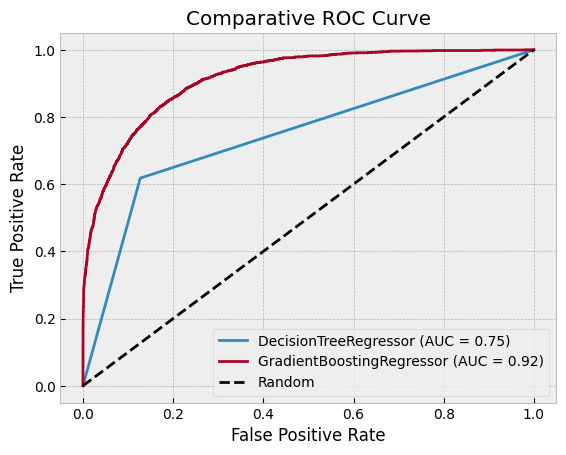

In [55]:
X = dfAmericanIncome.drop('income', axis=1)
y = dfAmericanIncome['income']

y_encoded = pd.get_dummies(y, drop_first=True)
X_encoded = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size = 0.45, train_size = 0.45, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_scaled)
X_test_imputed = imputer.transform(X_test_scaled)

X_train_imbalanced, y_train_imbalanced = resample(X_train_imputed, y_train, random_state=42)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_imputed)
X_test_pca = pca.transform(X_test_imputed)

models = [
    DecisionTreeRegressor(),
    GradientBoostingRegressor()
]

model_names = []
auc_scores = []
for model in models:
  model.fit(X_train_imputed, y_train)
  y_pred = model.predict(X_test_imputed)
  auc = roc_auc_score(y_test, y_pred)
  model_names.append(model.__class__.__name__)
  auc_scores.append(auc)
  fpr, tpr, _ = roc_curve(y_test, y_pred)
  plt.plot(fpr, tpr, label=f'{model.__class__.__name__} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label = 'Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparative ROC Curve')
plt.legend()
plt.show()

##### train_size = 0.8 y test_size = 0.15

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


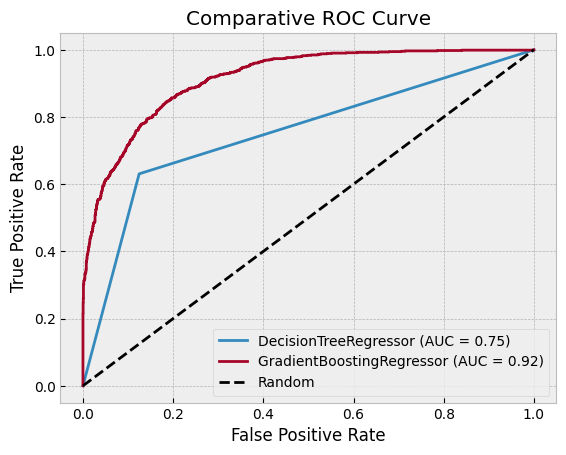

In [56]:
X = dfAmericanIncome.drop('income', axis=1)
y = dfAmericanIncome['income']

y_encoded = pd.get_dummies(y, drop_first=True)
X_encoded = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size = 0.15, train_size = 0.8, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_scaled)
X_test_imputed = imputer.transform(X_test_scaled)

X_train_imbalanced, y_train_imbalanced = resample(X_train_imputed, y_train, random_state=42)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_imputed)
X_test_pca = pca.transform(X_test_imputed)

models = [
    DecisionTreeRegressor(),
    GradientBoostingRegressor()
]

model_names = []
auc_scores = []
for model in models:
  model.fit(X_train_imputed, y_train)
  y_pred = model.predict(X_test_imputed)
  auc = roc_auc_score(y_test, y_pred)
  model_names.append(model.__class__.__name__)
  auc_scores.append(auc)
  fpr, tpr, _ = roc_curve(y_test, y_pred)
  plt.plot(fpr, tpr, label=f'{model.__class__.__name__} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label = 'Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparative ROC Curve')
plt.legend()
plt.show()

##### train_size = 0.2 y test_size = 0.7

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


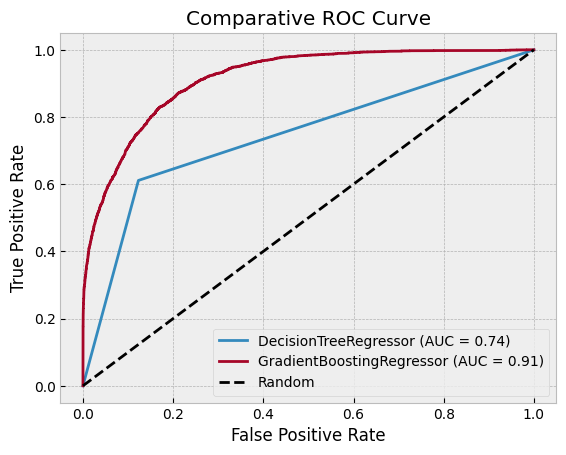

In [57]:
X = dfAmericanIncome.drop('income', axis=1)
y = dfAmericanIncome['income']

y_encoded = pd.get_dummies(y, drop_first=True)
X_encoded = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size = 0.7, train_size = 0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_scaled)
X_test_imputed = imputer.transform(X_test_scaled)

X_train_imbalanced, y_train_imbalanced = resample(X_train_imputed, y_train, random_state=42)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_imputed)
X_test_pca = pca.transform(X_test_imputed)

models = [
    DecisionTreeRegressor(),
    GradientBoostingRegressor()
]

model_names = []
auc_scores = []
for model in models:
  model.fit(X_train_imputed, y_train)
  y_pred = model.predict(X_test_imputed)
  auc = roc_auc_score(y_test, y_pred)
  model_names.append(model.__class__.__name__)
  auc_scores.append(auc)
  fpr, tpr, _ = roc_curve(y_test, y_pred)
  plt.plot(fpr, tpr, label=f'{model.__class__.__name__} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label = 'Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparative ROC Curve')
plt.legend()
plt.show()

### *Conclusión*
vemos que en la ejecución con underfitting (test_size y train_size de 0.01) la gráfica es bastante impresisa cuando la compraramos con las próximas ejecuciones de normal y over fitting, también vemos que los valores de AUC son menores, 0.69 y 0.81 para el TreeRegressior y BoostingRegressor respectivamente.

En los 2 casos de normal fitting, con test y traing size iguales primero en 10 y luego en 20%, tenemos AUC igual para el algoritmo TreeRegressor (0.75) y una mínima diferencia en BoostingRegressor, 0.90 para el 10% y 0.91 para el 20%, además de que la gráfica es muy similar.

Para todos los casos de overfitting vemos que los AUC no son muy diferentes por mas que se haya seteado un porcentaje mayor del dataset para trainning y testing, también vemos que las gráficas son muy similares a las de normal fitting a pesar de que estos cálculos consumieron mas recursos y tiempo para obtener el resultado.
